In [2]:
# Lire les deux premières ligne du ​ csv ​ des arbres de Grenoble (module ​ csv , ​voir doc officielle). Que représentent elles ?
import csv

filename = '/home/campus-5/Documents/Project_arbre 2019 01 16/0. Data/ESP_PUBLIC.IDENTITE_ARBRE.csv'

tree_dataset = list(csv.reader(open(filename)))

In [3]:
# Extraire l’information concernant l’année de plantation pour l’ensemble des lignes (​ rows ) ​ et stocker ces informations dans une variable de type ​ List
## Create a list of labels
data_columns = tree_dataset.pop(0)
### .pop() only works with index
data_columns

## Find the index of ANNEEDEPLANTATION
idx_s_col = data_columns.index('ANNEEDEPLANTATION')
## To create a list of year planted, do the following
year_planted = [row[idx_s_col] for row in tree_dataset]
### This means that among (for) all items (row) in the list 'tree_dataset', put into a new list those values that are in the in the item at the 19th index 'row[index]'

In [4]:
# Pour combien d’arbres manque-t-il l’information concernant la date de plantation ?
## For this calculate the total number of items in the year_planted list and subtract by the count of empty values in the year_planted list.
print(len(year_planted) - year_planted.count(''))
### year_planted.count('') returns the number of empty values in the year_planted list

30422


In [5]:
# Extraire l’ensemble des lignes (​ rows ​ ) et stocker ces informations dans une variable de type ​ List
list_of_columns = [row for row in tree_dataset]
### This creates a list and puts all items

In [6]:
# Combien d’arbres sont recensés dans ce jeu de données ?
len(year_planted)

31814

In [7]:
# Combien d’arbres ont été plantés en moyenne chaque année ?

## Import counter
from collections import Counter

## Count the total number of trees planted over the years
year_count = Counter(int(y) for y in year_planted if y != '')
### This puts into a list, the values in the list 'year_planted' if the values are not empty
### Counter creates a dictionary containing Key:Count

## Calculate the total number of trees over the years divided by the range of years
sum(year_count.values())/len(year_count)
### .values on a dictionary created by Count, gives the values (count)

## Error! There are some years missing! So find the missing years!
year_min, year_max = min(year_count), max(year_count)
### You can make multiple assignments this way
### min(Counter) gives you the minimum key (not minimum count)
missing = [set(range(year_min, year_max)) - set(year_count)]
number_missing = len(missing[0]) - 1
### These give the number of years that are missing
### ALTERNATIVELY - you can use 'set_one.difference(set(counter))' to find the differences between the 2 sets

## Now calculate the total number of trees over the years again with corrected numbers
sum(year_count.values())/(len(year_count) + number_missing)

447.38235294117646

In [8]:
# Afficher tous les arbres ayant été plantés l’année de votre naissance. 

birth_year = 1990

sum([tree_count for year, tree_count in year_count.items() if year == birth_year])
### dict.items() returns items in the dictionary as tuples
### This means: for key, count in year_count (which is rendered tuple), calculate the sum of tree_count if year is equal to birth_year

409

In [9]:
# Combien d’arbres ont été plantés depuis votre naissance ?

sum([tree_count for year, tree_count in year_count.items() if year >= birth_year])

13048

In [10]:
# # Quel Maire a planté le plus d’arbre à Grenoble ?

# # To make a dictionary containing the number of trees planted by each mayor
# tree_by_mayor = {}

# for myr in dict_mayor_full:
#     start_year = myr['START']
#     end_year = myr['END']
#     first_name = myr['FIRST_NAME']
#     last_name = myr['LAST_NAME']
        
#     counter = 0
#     for yr in dict_tree_full:
#         if yr['ANNEEDEPLANTATION'] != '' and int(yr['ANNEEDEPLANTATION']) >= int(start_year) and int(yr['ANNEEDEPLANTATION']) <= int(end_year):
#             counter += 1
#     tree_by_mayor[(first_name + ' ' + last_name)] = counter

# # To find the max value in my dictionary and return the key from the max-value

# tbm_list = []
# for i in tree_by_mayor:
#     tbm = tree_by_mayor[i]
#     tbm_list.append(tbm)

# for name, tree in tree_by_mayor.items():  
#     if tree == max(tbm_list):
#         print(name)

<IPython.core.display.Javascript object>


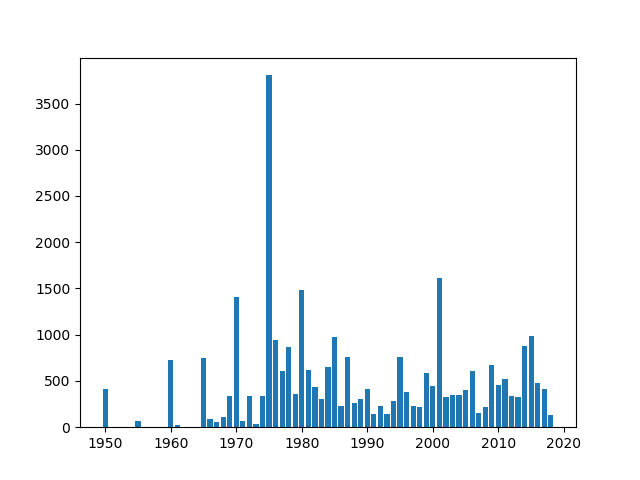

In [11]:
# Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année.
## import matplotlib
%matplotlib notebook
### '%matplotlib inline' if you want result as .png
### % is called magic functions. These will simplify things so check them out!
import matplotlib.pyplot as plt

x, y = zip(*year_count.items())
### zip() merges multiple lists value for value for values at the same index
### zip(*) unmerges lists value for value and returns values at their respective indices
plt.bar(x, y)
plt.show()

In [12]:
# Récupérez maintenant l’information concernant le genre botanique et la stocker conjointement avec l’année de plantation dans un tuple. Les tuples seront stockés dans une liste.

idx_year, idx_genus = data_columns.index('ANNEEDEPLANTATION'), data_columns.index('GENRE_BOTA')
### Finds indices of 'ANNEEDEPLANTATION' and 'GENRE_BOTA'
year_genus = tuple([row[idx_year], row[idx_genus]] for row in tree_dataset)
### Makes tuple '()' of year_genus

## Now turn that into a list
year_genus = list(year_genus)
### This turns the tuple(year_genus) into a list '[]'

In [13]:
# Pour combien d’arbre manque-t-il l’information concernant le genre botanique ?
## Separate out the genus from year_genus
_, genus = zip(*year_genus)
### '_' here means that I don't care what the variable is (this won't be used again)

## Subtract the count of empty values in the list of genus from the total
print(len(genus) - genus.count(''))

30750


In [14]:
# Triez les tuples en fonction de l’année de plantation par ordre décroissant.
## Import itemgetter which will allow me to specify the key
from operator import itemgetter

## Then sort the tuple in a descending order of years
sorted(year_genus, key=itemgetter(0,1), reverse=True)
### sorted(list_name , key=itemgetter(index of value you want to order by first, index of value you want to order by second) , reverse=True - for reverse ordering)

[['2018', 'Tilia'],
 ['2018', 'Taxus'],
 ['2018', 'Taxus'],
 ['2018', 'Taxus'],
 ['2018', 'Taxus'],
 ['2018', 'Taxus'],
 ['2018', 'Salix'],
 ['2018', 'Salix'],
 ['2018', 'Salix'],
 ['2018', 'Salix'],
 ['2018', 'Salix'],
 ['2018', 'Salix'],
 ['2018', 'Salix'],
 ['2018', 'Salix'],
 ['2018', 'Salix'],
 ['2018', 'Salix'],
 ['2018', 'Quercus'],
 ['2018', 'Quercus'],
 ['2018', 'Quercus'],
 ['2018', 'Quercus'],
 ['2018', 'Pyrus'],
 ['2018', 'Pyrus'],
 ['2018', 'Pyrus'],
 ['2018', 'Pyrus'],
 ['2018', 'Pyrus'],
 ['2018', 'Pyrus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Prunus'],
 ['2018', 'Paulownia'],
 ['2018', 'Paulownia'],
 ['2